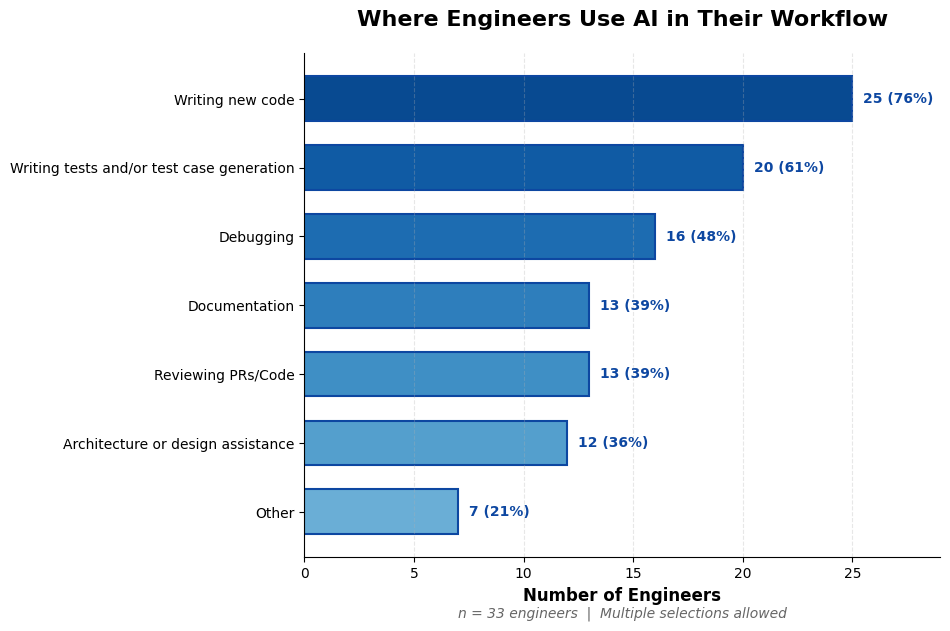


WHERE ENGINEERS USE AI IN THEIR WORKFLOW

📊 Sample Size: 33 engineers
   Total workflow selections: 106
   Average workflow stages per engineer: 3.2

🔄 Workflow Usage Breakdown:
   • Writing new code: 25 engineers (75.8%)
   • Writing tests and/or test case generation: 20 engineers (60.6%)
   • Debugging: 16 engineers (48.5%)
   • Reviewing PRs/Code: 13 engineers (39.4%)
   • Documentation: 13 engineers (39.4%)
   • Architecture or design assistance: 12 engineers (36.4%)
   • Other: 7 engineers (21.2%)

✨ Key Insights:
   • Top 3 use cases:
     1. Writing new code - 25 engineers
     2. Writing tests and/or test case generation - 20 engineers
     3. Debugging - 16 engineers
   • Engineers use AI across 7 different workflow stages
   • This shows AI is integrated throughout the development lifecycle, not just for one task




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get the workflow column
workflow_col = 'Where do you primarily use AI in your development workflow? (Select all that apply)'

# Parse the multi-select responses (comma-separated values)
all_workflows = []
for response in df_filtered[workflow_col].dropna():
    # Split by comma and strip whitespace
    workflows = [wf.strip() for wf in response.split(',')]
    all_workflows.extend(workflows)

# Count each workflow stage
workflow_counts = Counter(all_workflows)

# Convert to DataFrame for easier plotting
workflow_df = pd.DataFrame(workflow_counts.items(), columns=['Workflow Stage', 'Count'])
workflow_df = workflow_df.sort_values('Count', ascending=True)

# Calculate percentages
total_engineers = len(df_filtered)
workflow_df['Percentage'] = (workflow_df['Count'] / total_engineers) * 100

# Create figure - reduced by 20% (was 12x8, now 9.6x6.4)
fig, ax = plt.subplots(figsize=(9.6, 6.4))

# Modern blue color gradient
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(workflow_df)))

# Create horizontal bar chart
bars = ax.barh(workflow_df['Workflow Stage'], workflow_df['Count'], 
               color=colors, height=0.65, edgecolor='#0D47A1', linewidth=1.5)

# Add value labels on the bars
for bar, count, pct in zip(bars, workflow_df['Count'], workflow_df['Percentage']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{int(count)} ({pct:.0f}%)', 
            va='center', fontsize=10, weight='bold', color='#0D47A1')

# Customize the plot
ax.set_xlabel('Number of Engineers', fontsize=12, weight='bold')
ax.set_title('Where Engineers Use AI in Their Workflow', 
             fontsize=16, weight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, max(workflow_df['Count']) + 4)

# Add grid for readability
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add subtitle
plt.text(0.5, -0.12, f'n = {total_engineers} engineers  |  Multiple selections allowed', 
         ha='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("WHERE ENGINEERS USE AI IN THEIR WORKFLOW")
print("="*80)

print(f"\n📊 Sample Size: {total_engineers} engineers")
print(f"   Total workflow selections: {len(all_workflows)}")
print(f"   Average workflow stages per engineer: {len(all_workflows)/total_engineers:.1f}")

print(f"\n🔄 Workflow Usage Breakdown:")
for _, row in workflow_df.sort_values('Count', ascending=False).iterrows():
    print(f"   • {row['Workflow Stage']}: {int(row['Count'])} engineers ({row['Percentage']:.1f}%)")

print(f"\n✨ Key Insights:")
top_3 = workflow_df.nlargest(3, 'Count')
print(f"   • Top 3 use cases:")
for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"     {i}. {row['Workflow Stage']} - {int(row['Count'])} engineers")

print(f"   • Engineers use AI across {len(workflow_counts)} different workflow stages")
print(f"   • This shows AI is integrated throughout the development lifecycle, not just for one task")

print("\n" + "="*80 + "\n")